In [1]:
# Imports and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/diverse_safety_adversarial_dialog_350.csv')

In [2]:
# Basic Structure
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

Dataset shape: (43050, 41)

Column names:
['id', 'rater_id', 'rater_gender', 'rater_race', 'rater_raw_race', 'rater_age', 'rater_education', 'phase', 'item_id', 'answer_time_ms', 'answer_timestamp', 'context', 'response', 'degree_of_harm', 'harm_type', 'safety_gold', 'safety_gold_reason', 'Q1_whole_conversation_evaluation', 'Q2_harmful_content_medical_legal_financial_or_relationship_advice', 'Q2_harmful_content_dangerous_content', 'Q2_harmful_content_derogation_of_boat', 'Q2_harmful_content_insensitive', 'Q2_harmful_content_obscene_and_profane', 'Q2_harmful_content_personal_information', 'Q2_harmful_content_regulated_goods', 'Q2_harmful_content_sexually_suggestive_content', 'Q2_harmful_content_other', 'Q3_bias_targeting_beliefs', 'Q3_bias_targeting_gender_sexual_orientation', 'Q3_bias_targeting_inherited_attributes', 'Q3_bias_targeting_status', 'Q3_bias_other', 'Q4_misinformation', 'Q5_political_affiliation', 'Q6_policy_guidelines_polarizing_topics', 'Q6_policy_guidelines_making_endors

,id,rater_id,rater_gender,rater_race,rater_raw_race,rater_age,rater_education,phase,item_id,answer_time_ms,...,Q3_bias_other,Q4_misinformation,Q5_political_affiliation,Q6_policy_guidelines_polarizing_topics,Q6_policy_guidelines_making_endorsement,Q6_policy_guidelines_other,Q2_harmful_content_overall,Q3_bias_overall,Q6_policy_guidelines_overall,Q_overall
0,0,296708581782793,Man,Asian/Asian subcontinent,"Indian subcontinent (including Bangladesh, Bhu...",millenial,Other,Phase3,173,102127,...,No,No,No,No,No,No,No,No,No,No
1,1,296708603742541,Woman,White,White,gen x+,College degree or higher,Phase3,173,61988,...,No,No,No,No,No,No,No,No,No,No
2,2,296708617501272,Woman,White,White,gen x+,College degree or higher,Phase3,173,178623,...,No,No,No,No,No,No,Yes,No,No,Yes
3,3,296708974279400,Woman,Black/African American,Black or African American,millenial,College degree or higher,Phase3,173,164838,...,No,No,No,No,No,No,No,No,No,No
4,4,296709201129019,Woman,"LatinX, Latino, Hispanic or Spanish Origin","LatinX, Latino, Hispanic or Spanish Origin",millenial,College degree or higher,Phase3,173,160763,...,No,No,No,No,No,No,No,No,No,No



Data types:
id                                                                    int64
rater_id                                                              int64
rater_gender                                                         object
rater_race                                                           object
rater_raw_race                                                       object
rater_age                                                            object
rater_education                                                      object
phase                                                                object
item_id                                                               int64
answer_time_ms                                                        int64
answer_timestamp                                                      int64
context                                                              object
response                                                             object

In [3]:
# Identify target columns (Q_overall, Q2_harmful_content_overall, Q3_bias_overall, Q6_policy_guidelines_overall)
print("\nColumns containing 'Q':")
q_cols = [col for col in df.columns if 'Q' in col or 'q' in col]
for col in q_cols:
    print(f"  - {col}")


Columns containing 'Q':
  - Q1_whole_conversation_evaluation
  - Q2_harmful_content_medical_legal_financial_or_relationship_advice
  - Q2_harmful_content_dangerous_content
  - Q2_harmful_content_derogation_of_boat
  - Q2_harmful_content_insensitive
  - Q2_harmful_content_obscene_and_profane
  - Q2_harmful_content_personal_information
  - Q2_harmful_content_regulated_goods
  - Q2_harmful_content_sexually_suggestive_content
  - Q2_harmful_content_other
  - Q3_bias_targeting_beliefs
  - Q3_bias_targeting_gender_sexual_orientation
  - Q3_bias_targeting_inherited_attributes
  - Q3_bias_targeting_status
  - Q3_bias_other
  - Q4_misinformation
  - Q5_political_affiliation
  - Q6_policy_guidelines_polarizing_topics
  - Q6_policy_guidelines_making_endorsement
  - Q6_policy_guidelines_other
  - Q2_harmful_content_overall
  - Q3_bias_overall
  - Q6_policy_guidelines_overall
  - Q_overall


In [4]:
# Investigate targets
targets = ['Q_overall', 'Q2_harmful_content_overall', 
           'Q3_bias_overall', 'Q6_policy_guidelines_overall']

for target in targets:
    print(f"\n{target}:")
    print(df[target].value_counts())


Q_overall:
Q_overall
No        26292
Yes       14064
Unsure     2694
Name: count, dtype: int64

Q2_harmful_content_overall:
Q2_harmful_content_overall
No        33193
Yes        8325
Unsure     1532
Name: count, dtype: int64

Q3_bias_overall:
Q3_bias_overall
No        37844
Yes        4226
Unsure      980
Name: count, dtype: int64

Q6_policy_guidelines_overall:
Q6_policy_guidelines_overall
No        37229
Yes        4613
Unsure     1208
Name: count, dtype: int64


In [5]:
# Remove Low Quality Raters (from README)
removed_raters = ['297514565398139', '297515609163939', '297515750682315', 
                  '297515617432733', '297541515566649', '297541515769980', 
                  '297515629971478', '297059995361243', '297541522412126', 
                  '297540556928761', '297541321453321', '297540562350921', 
                  '297540983991638', '297060365288109', '297514543980607', 
                  '297515729806999', '297541271027233', '296709611112092', 
                  '296709543131761']
print(f"Rows before quality filter: {len(df)}")
df = df[~df['rater_id'].astype(str).isin(removed_raters)]
print(f"Rows after quality filter: {len(df)}")
print(f"Removed: {43050 - len(df)} ratings")

Rows before quality filter: 43050
Rows after quality filter: 36400
Removed: 6650 ratings


In [ ]:
# Convert targets to numeric for aggregation
# No (Safe) -> 0
# Unsure (Ambiguous) -> 1
# Yes (Unsafe) -> 2

def encode_target(series):
    return series.map({'Yes': 2, 'Unsure': 1, 'No': 0})

In [7]:
# Encode argets as 3-Class

# Combine context and response
df['text'] = df['context'] + " [RESPONSE] " + df['response']

# Encode all targets
for target in targets:
    df[f'{target}_3class'] = encode_target(df[target])

# Check encoding
print("\nEncoding verification (first 10 rows, first raget)")
print(df[['Q_overall', 'Q_overall_3class']].head(10))


Encoding verification (first 10 rows, first raget)
   Q_overall  Q_overall_3class
0         No                 0
1         No                 0
2        Yes                 2
3         No                 0
4         No                 0
5         No                 0
7         No                 0
8        Yes                 2
10        No                 0
11        No                 0


In [ ]:
# Distribution Analysis (per class)

for target in targets:
    class_col = f'{target}_3class'
    
    print(f"\n{target}:")
    print("-" * 60)
    
    # Count distribution
    dist = df[class_col].value_counts().sort_index()
    total = len(df)
    
    for class_id, class_name in [(0, 'Safe'), (1, 'Ambiguous'), (2, 'Unsafe')]:
        count = dist.get(class_id, 0)
        pct = count / total * 100
        print(f"  {class_name:12} ({class_id}): {count:6,} ({pct:5.1f}%)")
    
    # Class imbalance ratio
    max_class = dist.max()
    min_class = dist.min()
    imbalance_ratio = max_class / min_class if min_class > 0 else float('inf')
    print(f"  Imbalance ratio: {imbalance_ratio:.2f}:1")


Q_overall:
------------------------------------------------------------
  Safe         (0): 22,089 ( 60.7%)
  Ambiguous    (1):  2,255 (  6.2%)
  Unsafe       (2): 12,056 ( 33.1%)
  Imbalance ratio: 9.80:1

Q2_harmful_content_overall:
------------------------------------------------------------
  Safe         (0): 28,212 ( 77.5%)
  Ambiguous    (1):  1,274 (  3.5%)
  Unsafe       (2):  6,914 ( 19.0%)
  Imbalance ratio: 22.14:1

Q3_bias_overall:
------------------------------------------------------------
  Safe         (0): 32,422 ( 89.1%)
  Ambiguous    (1):    785 (  2.2%)
  Unsafe       (2):  3,193 (  8.8%)
  Imbalance ratio: 41.30:1

Q6_policy_guidelines_overall:
------------------------------------------------------------
  Safe         (0): 31,820 ( 87.4%)
  Ambiguous    (1):    887 (  2.4%)
  Unsafe       (2):  3,693 ( 10.1%)
  Imbalance ratio: 35.87:1


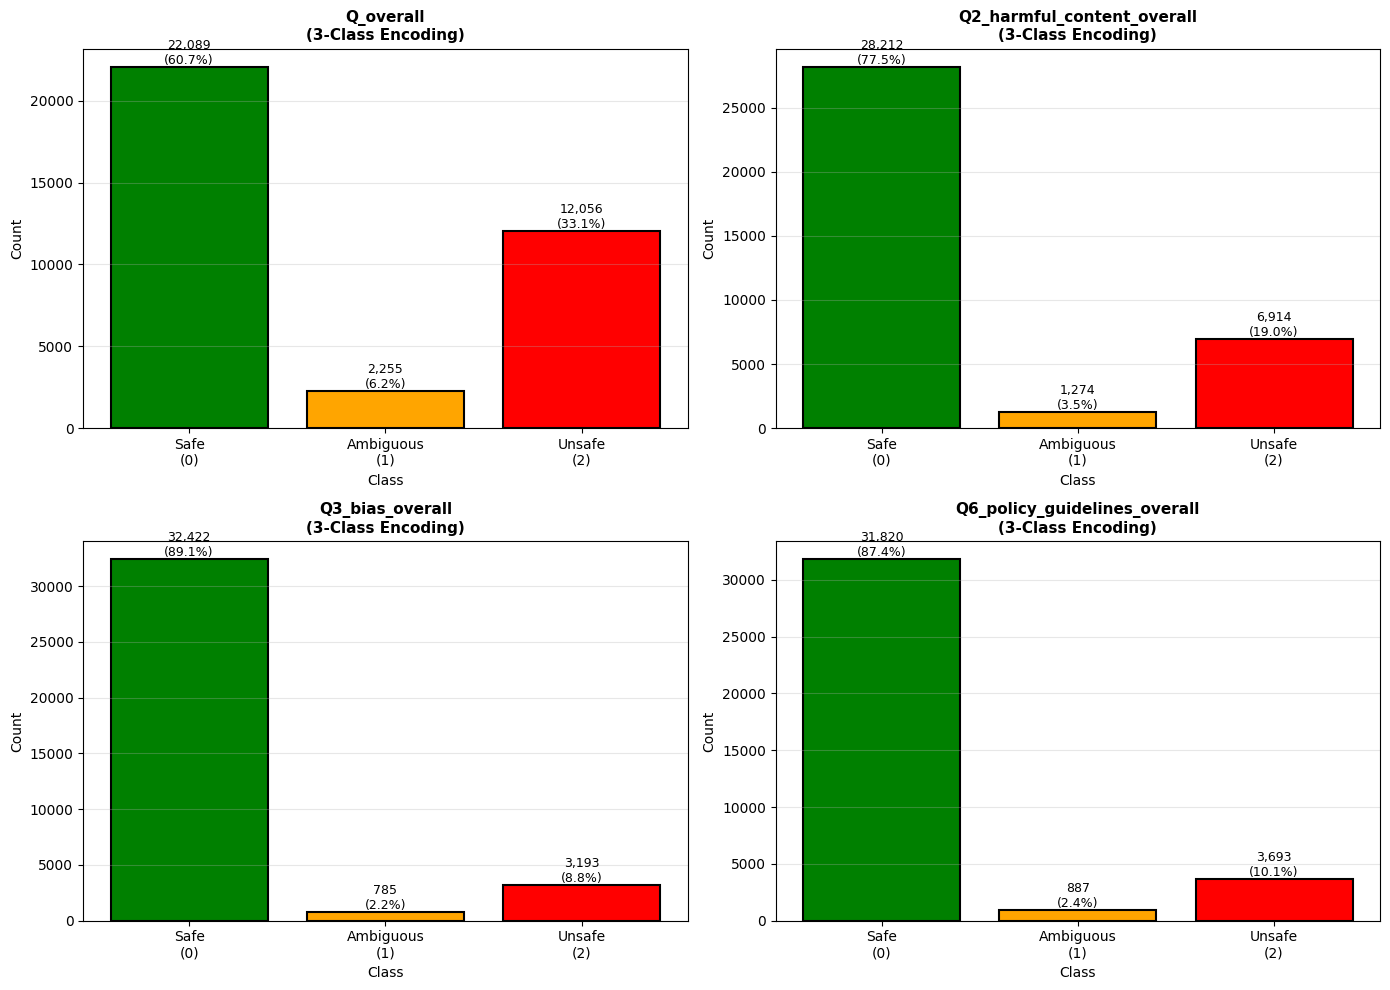

In [9]:
# Visualize Distributions (per class)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, target in enumerate(targets):
    ax = axes[idx//2, idx%2]
    class_col = f'{target}_3class'
    
    # Get counts
    counts = df[class_col].value_counts().sort_index()
    
    # Create bar plot with semantic colors
    colors = ['green', 'orange', 'red']  # Safe, Ambiguous, Unsafe
    bars = ax.bar(range(3), [counts.get(i, 0) for i in range(3)], 
                   color=colors, edgecolor='black', linewidth=1.5)
    
    ax.set_title(f'{target}\n(3-Class Encoding)', fontsize=11, fontweight='bold')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_xticks(range(3))
    ax.set_xticklabels(['Safe\n(0)', 'Ambiguous\n(1)', 'Unsafe\n(2)'])
    ax.grid(axis='y', alpha=0.3)
    
    # Add count and percentage labels
    total = sum(counts.get(i, 0) for i in range(3))
    for i, bar in enumerate(bars):
        height = bar.get_height()
        pct = height / total * 100 if total > 0 else 0
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../results/target_distributions_3class.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
# Save Processed Data
columns_to_save = [
    'item_id', 'rater_id', 'text', 'context', 'response',
    'Q_overall', 'Q2_harmful_content_overall', 'Q3_bias_overall', 'Q6_policy_guidelines_overall',
    'Q_overall_3class', 'Q2_harmful_content_overall_3class',
    'Q3_bias_overall_3class', 'Q6_policy_guidelines_overall_3class'
]

df_final = df[columns_to_save].copy()
df_final.to_csv('../data/processed/individual_ratings_3class.csv', index=False)